In [4]:
import numpy as np
import matplotlib.pyplot as plt

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

### Ejercicio 1

Realizar un gráfico interactivo que multiplique un conjunto de vectores por una matriz parametrizable. Se deben mostrar el espacio original, los transformado y el transformado por la inversa en 3 subplots distintos. Se deben mostrar los autovectores con sus correspondientes autovalores, su determinante y su rango.

Text(0.5, 0, 'Espacio original')

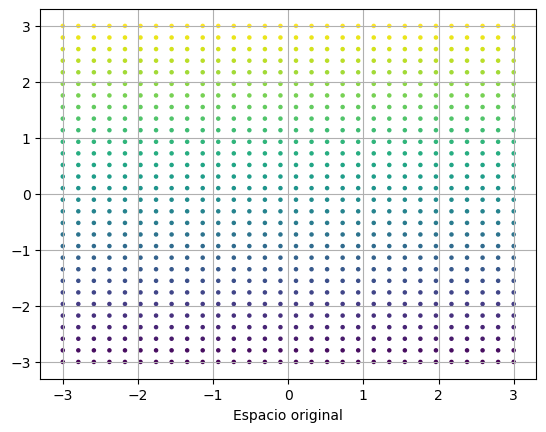

In [5]:
dots = np.linspace(-3, 3, 30)
x, y = np.meshgrid(dots, dots)
data = [x.ravel(), y.ravel()]


plt.grid()
plt.scatter(*data, c=data[1], s=5)
plt.xlabel("Espacio original")

In [6]:
data = np.array(data)
def imprimir_scatter(alpha):
    Matriz = np.array([[np.cos(alpha),-np.sin(alpha)],
              [np.sin(alpha),np.cos(alpha)]])
    transformado = Matriz@data[:,:]
    plt.grid()
    plt.scatter(*transformado,c=data[1],s=8)

interactive(imprimir_scatter, alpha=widgets.FloatSlider(value=0,min=-5,max=5,step=0.05))

interactive(children=(FloatSlider(value=0.0, description='alpha', max=5.0, min=-5.0, step=0.05), Output()), _d…

In [7]:
data = np.array(data)

In [8]:
def imprimir_inversa(alpha):
    Matriz = np.array([[np.cos(alpha),-np.sin(alpha)],
              [np.sin(alpha),np.cos(alpha)]])
    transformado = Matriz@data[:,:]
    inversa = np.linalg.inv(transformado)
    print(inversa)
    plt.grid()
    plt.scatter(inversa[0],inversa[1],c=data[1],s=8)
    

#interactive(imprimir_inversa, alpha=widgets.FloatSlider(value=0,min=-5,max=5,step=0.2))


interactive(imprimir_inversa, alpha=widgets.FloatSlider(value=0,min=-5,max=5,step=0.05))

interactive(children=(FloatSlider(value=0.0, description='alpha', max=5.0, min=-5.0, step=0.05), Output()), _d…

### Ejercicio 2 - SOLUCION

Crear una cuadrícula de puntos en 2D. Crear después una matriz que proyecte esos puntos en R3. Aplicar a todos los puntos la función de tangente hiperbólica. Volver a proyectar los puntos en 2D. Visualizar todos los pasos intermedios y dar una interpretación al resultado final.

In [9]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

mpl.rcParams['legend.fontsize'] = 10

Text(0.5, 0, 'cuadrícula de puntos en 2D')

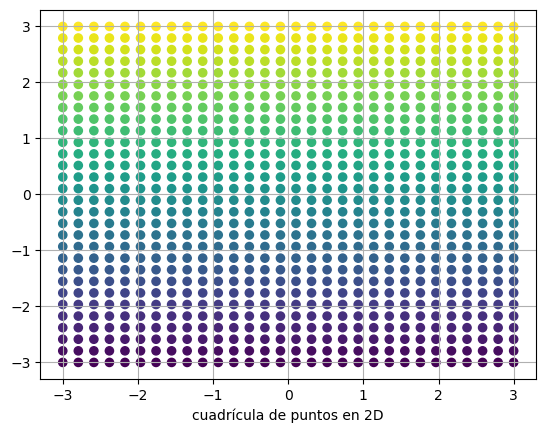

In [11]:
#Puntos 2D

puntos = np.linspace(-4, 4, 10)
x, y = np.meshgrid(puntos, puntos)
data = np.array(data)

plt.grid()
plt.scatter(*data, c=data[1], s=35)
plt.xlabel("cuadrícula de puntos en 2D")

In [13]:
A = np.random.random((3,2))

In [15]:
dataR3 = A@data

In [19]:
ax = plt.figure().add_subplot(projection='3D')

x = no.random.sample(20)
y = no.random.sample(20)
z = no.random.sample(20)
ax.scatter(dataR3[0,:],dataR3[1,:],zs=dataR3[2,:],s=10,c=data)


ValueError: Unknown projection '3D'

<Figure size 640x480 with 0 Axes>

ValueError: Argument Z must be 2-dimensional.

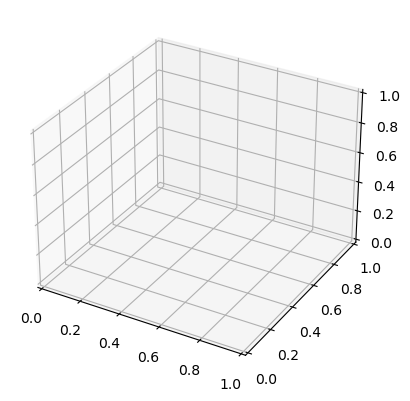

In [8]:
#Puntos 3D

## z tiene que ser tres por dos! y viceversa para volver!   tanh funcion para la tangente

from mpl_toolkits.mplot3d import axes3d

puntos = np.logspace(2, 3, 10)
x, y, z = np.meshgrid(puntos, puntos, puntos)

data = [x.ravel(), y.ravel(), z.ravel()]


fig = plt.figure()
ax = fig.add_subplot(projection='3d')


ax.plot_wireframe(x, y, z, rstride=10, cstride=10)

plt.show()

print(np.linalg.det(x))
x


### Ejercicio 3

A partir de una matriz, realizar la SVD y visualizar todos los pasos intermedios de las operaciones.

https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html

In [ ]:

dots = np.linspace(0, 8, 30)
x, y = np.meshgrid(dots, dots)
matriz3 = [x.ravel(), y.ravel()]

svd = linalg.svd(matriz3, full_matrices=True, compute_uv=True, hermitian=False)


### Ejercicio 4

Resolver el siguiente problema mediante la aplicación de los mínimos cuadrados. ¿Cómo se interpreta el resultado?¿Qué feature influye más en el precio?

In [20]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

print(housing['DESCR'])
print(housing['feature_names'])

x = housing['data']
y = housing['target']

c = np.linalg.inv(x.T@x)@x.T@y

print(np.max(c))

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

### Ejemplo SVD

In [ ]:
#convertirlo en un vector para transformarlo y despues reshape para pasarlo a matriz

# despues de todo quedarse con las 50 mas importantes
from sklearn.datasets import fetch_olivetti_faces

In [ ]:
faces = fetch_olivetti_faces()
u, s, vh = np.linalg.svd(faces.data.T, full_matrices=True)

diag = np.zeros((4096, 400))
np.fill_diagonal(diag, s)

In [ ]:
plt.imshow(np.reshape(faces.data[20], (64, 64)))

In [ ]:
plt.imshow(np.reshape(u[:, 10], (64, 64)), cmap='Greys')

In [ ]:
n = 10
plt.imshow(np.reshape((u[:, :n]@diag[:n, :n]@vh[:n])[:, 0], (64, 64)))

In [ ]:
n = 10
plt.imshow(np.reshape((u[:, :n]@diag[:n, :n]@vh[:n])[:, 1], (64, 64)))